In [3]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score
from keras.models import load_model

In [32]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import random

In [7]:
train_path = r'D:\university\Thesis\final\Flower kath golap\1training'
test_path = r'D:\university\Thesis\final\Flower kath golap\2testing'
val_path = r'D:\university\Thesis\final\Flower kath golap\3vali'

Bloom


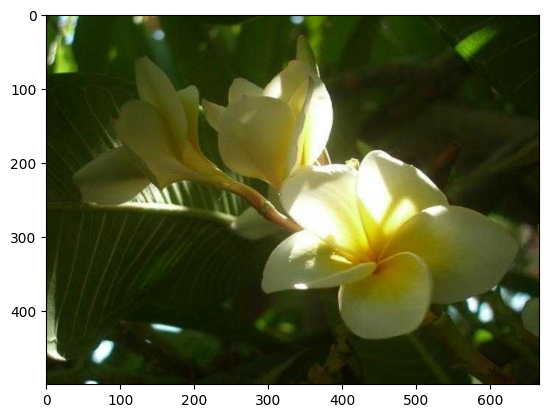

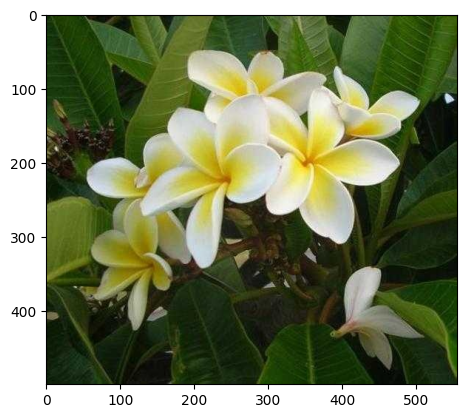

Post Bloom


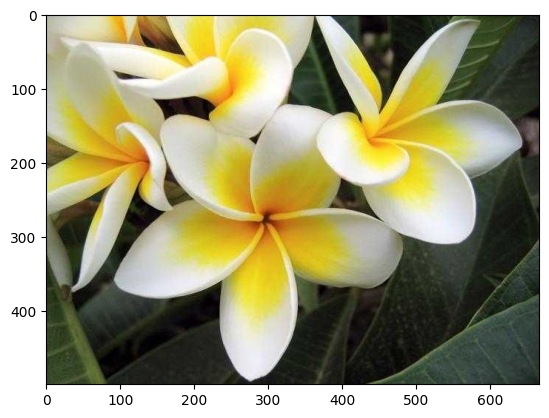

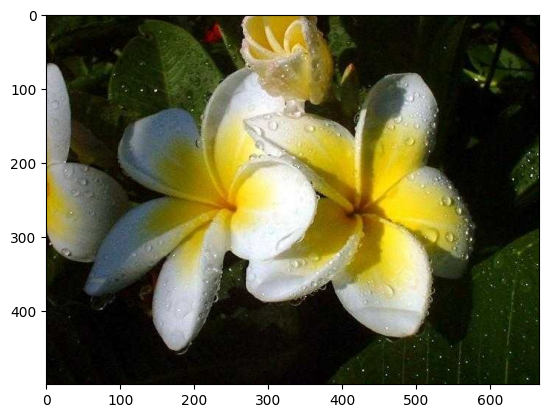

Pre Bloom


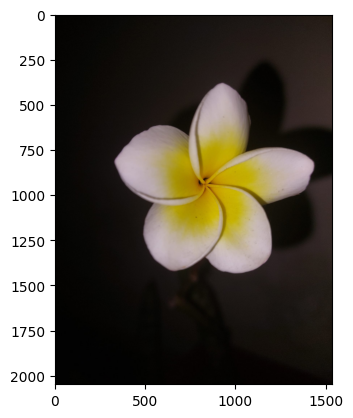

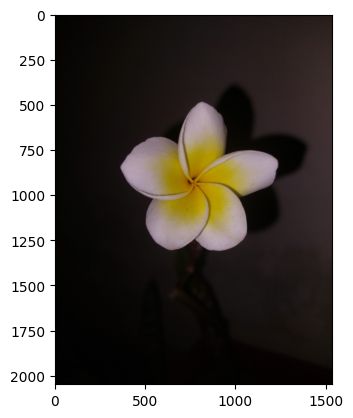

In [8]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [9]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [10]:
size = (250,250)

In [11]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [12]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [13]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [14]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [15]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 1170 images belonging to 3 classes.
Found 325 images belonging to 3 classes.
Found 210 images belonging to 3 classes.


In [16]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [17]:
train_class.class_indices

{'Bloom': 0, 'Post Bloom': 1, 'Pre Bloom': 2}

In [18]:
a = train_class.class_indices

In [19]:
y_train.shape,y_test.shape,y_val.shape

((1170,), (325,), (210,))

In [20]:
model1 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model1.hdf5')
model2 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model2.hdf5')
model3 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model3.hdf5')

In [21]:
models = [model1, model2, model3]

In [22]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

11/11 [==============================] - 4s 325ms/step


In [23]:
print(preds)

[[[0.08535723 0.00653152 0.9081113 ]
  [0.35198584 0.04869414 0.5993199 ]
  [0.70048493 0.05226288 0.24725215]
  ...
  [0.83443904 0.03845817 0.12710279]
  [0.6156839  0.06182178 0.32249436]
  [0.13355441 0.02800749 0.83843803]]

 [[0.04532211 0.04239908 0.91227883]
  [0.47147128 0.1957048  0.3328238 ]
  [0.76899624 0.13704379 0.09396006]
  ...
  [0.6075307  0.2978735  0.09459574]
  [0.53622216 0.05699667 0.40678123]
  [0.03828644 0.02391055 0.93780303]]

 [[0.39552125 0.22898982 0.3754889 ]
  [0.3955579  0.2289531  0.37548897]
  [0.39548147 0.2289889  0.37552953]
  ...
  [0.39556026 0.22906268 0.37537706]
  [0.39555812 0.22897027 0.37547165]
  [0.39561087 0.22899906 0.37539008]]]


In [24]:
ensemble_prediction = np.argmax(summed, axis=1)

In [25]:
print(ensemble_prediction)

[2 2 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 2 0 0 2 1 2 2 0 2 2 0 1 0 0 2 0 0 2 0 2
 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 0 2 2 0 0 0 0 2 2 0 2 2 0 2 2 0 0 2 2
 2 2 0 2 2 0 1 2 2 2 1 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 0 0 0
 0 2 2 0 2 1 2 0 2 2 2 2 0 1 2 2 2 2 0 2 1 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2
 0 2 2 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 0 0 2
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 0 2 0 2 2 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 0 0 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 0 2]


In [26]:
prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

11/11 [==============================] - 4s 344ms/step


In [27]:
print('prediction1= ', prediction1)

prediction1=  [[8.53572339e-02 6.53152028e-03 9.08111274e-01]
 [3.51985842e-01 4.86941449e-02 5.99319875e-01]
 [7.00484931e-01 5.22628762e-02 2.47252151e-01]
 [8.60315785e-02 3.83624062e-02 8.75605881e-01]
 [6.75111592e-01 3.43326330e-02 2.90555805e-01]
 [2.96057642e-01 5.55466786e-02 6.48395598e-01]
 [9.09016907e-01 8.90767295e-03 8.20754245e-02]
 [2.35086069e-01 7.77691929e-03 7.57137001e-01]
 [3.20969582e-01 6.71654940e-02 6.11864984e-01]
 [8.00260186e-01 4.65420745e-02 1.53197721e-01]
 [5.46325624e-01 4.46787365e-02 4.08995628e-01]
 [3.51985842e-01 4.86941449e-02 5.99319875e-01]
 [2.57131130e-01 7.72446347e-03 7.35144377e-01]
 [3.09614748e-01 1.63047433e-01 5.27337849e-01]
 [4.06997800e-02 1.71447489e-02 9.42155361e-01]
 [9.81207192e-01 5.70239546e-03 1.30904121e-02]
 [4.67031389e-01 4.65629809e-02 4.86405581e-01]
 [9.48360935e-02 1.74856465e-02 8.87678206e-01]
 [6.65098071e-01 4.11219522e-02 2.93780059e-01]
 [6.65098071e-01 4.11219522e-02 2.93780059e-01]
 [1.76058203e-01 1.8537489

In [28]:
prediction1 = np.argmax(prediction1,axis=1)
prediction2 = np.argmax(prediction2,axis=1)
prediction3 = np.argmax(prediction3,axis=1)

In [29]:
accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)

In [30]:
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

In [31]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.41846153846153844
Accuracy Score for model2 =  0.49538461538461537
Accuracy Score for model3 =  0.3292307692307692
Accuracy Score for average ensemble =  0.4430769230769231


In [33]:
print(ensemble_prediction)

[2 2 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 2 0 0 2 1 2 2 0 2 2 0 1 0 0 2 0 0 2 0 2
 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 0 2 2 0 0 0 0 2 2 0 2 2 0 2 2 0 0 2 2
 2 2 0 2 2 0 1 2 2 2 1 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 0 0 0
 0 2 2 0 2 1 2 0 2 2 2 2 0 1 2 2 2 2 0 2 1 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2
 0 2 2 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 0 0 2
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 0 2 0 2 2 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 0 0 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 0 2]


In [34]:
print(x_test)

[[[[0.34901961 0.53333333 0.40784314]
   [0.37647059 0.55294118 0.44705882]
   [0.39215686 0.56078431 0.4745098 ]
   ...
   [0.30588235 0.62352941 0.49411765]
   [0.30588235 0.63529412 0.50196078]
   [0.29803922 0.62745098 0.49411765]]

  [[0.36862745 0.54509804 0.43921569]
   [0.36078431 0.53333333 0.44313725]
   [0.38039216 0.54509804 0.47843137]
   ...
   [0.30588235 0.62352941 0.49411765]
   [0.28235294 0.63137255 0.47843137]
   [0.29019608 0.63921569 0.48627451]]

  [[0.36862745 0.54509804 0.44705882]
   [0.38039216 0.54509804 0.4745098 ]
   [0.38823529 0.54901961 0.49019608]
   ...
   [0.31372549 0.63137255 0.50196078]
   [0.25882353 0.63137255 0.45882353]
   [0.27843137 0.65098039 0.47843137]]

  ...

  [[0.1254902  0.23137255 0.15686275]
   [0.13333333 0.23529412 0.16470588]
   [0.1254902  0.22745098 0.15686275]
   ...
   [0.12156863 0.24705882 0.15294118]
   [0.12156863 0.24705882 0.15294118]
   [0.1254902  0.25098039 0.15686275]]

  [[0.10588235 0.20784314 0.1372549 ]
   [0.1

In [35]:
x=np.argmax(x_test)

In [36]:
print(x)

100


In [37]:
print(ensemble_prediction)

[2 2 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 2 0 0 2 1 2 2 0 2 2 0 1 0 0 2 0 0 2 0 2
 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 0 2 2 0 0 0 0 2 2 0 2 2 0 2 2 0 0 2 2
 2 2 0 2 2 0 1 2 2 2 1 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 0 0 0
 0 2 2 0 2 1 2 0 2 2 2 2 0 1 2 2 2 2 0 2 1 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2
 0 2 2 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 0 0 2
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 0 2 0 2 2 0 0 0 2 0 0 2 2 2 0 2 2 2 2 2
 2 0 0 0 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 0 2]


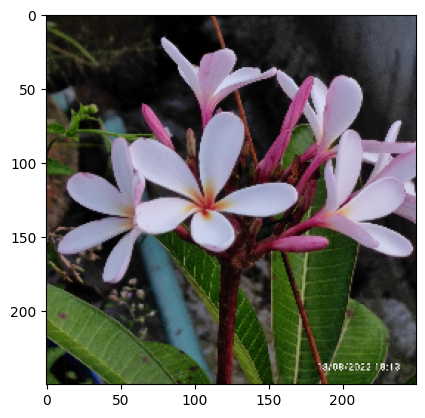

In [38]:
img_sample=random.randint(0,len(y_test))
plt.imshow(cv2.cvtColor(x_test[img_sample, :].astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()